# Achievement 4 Final 

## 01 Importing Libraries and Data 

In [2]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy 

In [3]:
path = r'/Users/brookecoffey/10-07-2023 Instacart Basket Analysis'

In [4]:
df_final = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_final_cleaned.pkl'))

## 02 Summarizing Dataframe Before Manipulations

In [5]:
df_final.shape

(30624960, 33)

In [6]:
df_final.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,married_status,income,...,busiest_day,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,median_days_since_prior_order,frequency_tag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer


In [7]:
df_final.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'married_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_order_price',
       'spending_flag', 'median_days_since_prior_order', 'frequency_tag'],
      dtype='object')

## 03a Transformations for PII Compliance

#### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

#### Only PII data I could find was the first_name and last_name columns.  I will drop those from the working dataset

In [8]:
# Dropping first_name and last_name from the working dataset
df_final_private = df_final.drop(columns = ['first_name', 'last_name'])

In [9]:
# Check stats on new dataframe to maintain integrity 
df_final_private.head()

,user_id,gender,state,age,date_joined,n_dependants,married_status,income,order_id,order_number,...,busiest_day,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,median_days_since_prior_order,frequency_tag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Mid-range product,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Mid-range product,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer


In [10]:
df_final_private.shape

(30624960, 31)

#### Nothing missing except for the personal info 

## 03b Transformations to Create Region Column

In [11]:
# Using function to create regions based on the states column

In [12]:
region=[]
for value in df_final_private['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [13]:
# creating a new column based off of the function above 
df_final_private['region'] = region

In [14]:
# checking frequencies of the new column 
df_final_private['region'].value_counts()

South        10197336
West          7830688
Midwest       7175716
Northeast     5421220
Name: region, dtype: int64

## 03c Crossing Region with Spending Flag 

In [15]:
# using a crosstab to see relationship between region and spending 
regional_spend_crosstab = pd.crosstab(df_final_private['region'], df_final_private['spending_flag'], dropna = False)

In [16]:
regional_spend_crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,148609,7027107
Northeast,100615,5320605
South,194877,10002459
West,146681,7684007


In [17]:
# Sorting the results in Descending order 
regional_spend_crosstab = regional_spend_crosstab.sort_values(by=['Low Spender'], ascending = False)

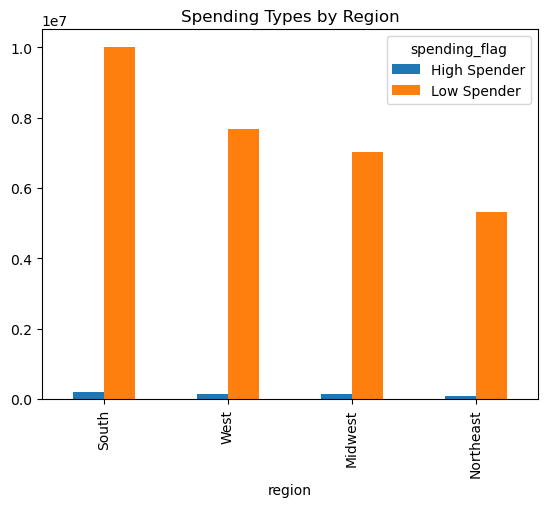

In [18]:
# Creating a visualization for the above dataframe
regional_spend_viz = regional_spend_crosstab.plot.bar()
plt.title('Spending Types by Region')
plt.show()

## 03d Excluding Low-Performing Customers

In [19]:
# Using loc function to identify customers that don't generate much revenue 
df_final_private.loc[df_final_private['max_order'] < 5, 'activity_level'] = 'Low Activity User'
df_final_private.loc[df_final_private['max_order'] >= 5, 'activity_level'] = 'Active User'

In [20]:
df_final_private['activity_level'].value_counts()

Active User          29266394
Low Activity User     1358566
Name: activity_level, dtype: int64

In [21]:
# Creating a new dataframe excluding low activity users
df_final_private_excluded = df_final_private[df_final_private['activity_level']=='Active User']

In [22]:
df_final_private.shape

(30624960, 33)

In [23]:
df_final_private_excluded.shape

(29266394, 33)

In [24]:
29266394 - 30624960

-1358566

### New Dataframe correctly excludes the low activity users 

### Exporting refined dataset excluding Low Activity Users

In [25]:
df_final_private_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_private_excluded.pkl'))

## Exporting Visualizations 

In [26]:
#Exporting graph
regional_spend_viz.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spend_viz.png'))